In [ ]:
# 크롤링시 필요한 라이브러리 불러오기
from bs4 import BeautifulSoup
import requests
import re
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service as ChromeService
import pandas as pd

In [ ]:
news_df = pd.DataFrame(columns = ['news_text','category'])
news_df

,news_text,category


In [ ]:
cats=[100,101,103,105] # 카테고리
ind = 0 # 행 번호
for cat in cats:   
    for i in range(50):
        # https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100
        # https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid1=100&sid2=269
        url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1='+str(cat)+'&date=%2000:00:00&page='+str(i+1) 
        headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.90 Safari/537.36'}
        
        # requests를 이용하여 해당 url에 get 요청을 보내고 응답을 받는다.
        # 상태 코드와 HTML 내용을 응답 받을 수 있다.
        news = requests.get(url, headers=headers)
        
        # 응답받은 HTML 내용을 BeautifulSoup 클래스의 객체 형태로 생성/반환한다.
        soup = BeautifulSoup(news.text,'html.parser')
        # CSS 셀렉터를 이용하여 원하는 정보를 searching
        links = soup.select('#main_content > div > div > div> div > div> ul > li > div > a')
        #main_content > div > div:nth-child(3) > div > div.cluster_body > ul > li:nth-child(1) > div > a
        
        # 첫번째 뉴스, 두번째 세번째 numbering 하기 위해 enumerate 사용
        # 주소를 가져온 뒤 거기서 id로 준 값에 해당하는 내용 추출
        newslinks=[]
        for j, a in enumerate(links):            
            newslink = a.get('href')
            newslinks.append(newslink)
            newslinks = list(set(newslinks))        
        
        for link in newslinks:
            res2 = requests.get(link,headers = headers).text
            soup2 = BeautifulSoup(res2,'html.parser')
            news = soup2.find('div',id = "articleBodyContents").text
            news = re.sub('\n','',news) # 개행 제거
            news = re.sub('\t','',news) # tab 제거
            news_df.loc[ind] = [news,cat]
            ind += 1
news_df

SyntaxError: invalid syntax (Temp/ipykernel_19132/2670099436.py, line 6)

In [ ]:
news_df['category'].value_counts()

100    2000
101    1500
105    1000
103     850
Name: category, dtype: int64

In [ ]:
news_df.to_csv('news_df.csv',mode='w', encoding='utf8')
n_df = pd.read_csv('news_df.csv',index_col=0)
n_df

,news_text,category
0,4.19 혁명 62주년인 오늘 문재인 대통령은 민주주의는 국민의 관심으로 성장한다면...,100
1,국민의힘 김용태 청년 최고위원은 정호영 보건복지부 장관 후보자 자녀 특혜 논란과 관...,100
2,사진 제공: 연합뉴스김용태 국민의힘 청년최고위원이 정호영 보건복지부 장관 후보자의 ...,100
3,박지현 더불어민주당 공동 비상대책위원장 MBC 라디오 인터뷰 발언박지현 더불어민주당...,100
4,박지현 더불어민주당 공동비대위원장은 장제원 당선인 비서실장이 이른바 '아빠 찬스...,100
...,...,...
5345,기사내용 요약네이버 “새로운 리더십으로 인한 세대교체 측면”최인혁 전 네이버 부사장...,105
5346,SK㈜ C&C는 초경합금 공구 제조기업인 한국야금에 ESG(환경·사회·지배구조) 경...,105
5347,카카오엔터테인먼트 글로벌 웹툰 플랫폼 카카오웹툰이 독일 IF 디자인 어워드 2022...,105
5348,[이미지출처=연합뉴스]네이버 직장 내 괴롭힘에 따른 직원 사망 사건과 관련해 책임론...,105


In [ ]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
pd.set_option('display.max.colwidth',100)
n_df.head()

,news_text,category
0,"4.19 혁명 62주년인 오늘 문재인 대통령은 민주주의는 국민의 관심으로 성장한다면서 민주주의가 정치를 넘어 경제로, 생활로 끊임없이 확장될 때 억압과 차별, 부당한 권력으...",100
1,국민의힘 김용태 청년 최고위원은 정호영 보건복지부 장관 후보자 자녀 특혜 논란과 관련해 국민은 윤석열 정부에 공정과 상식을 기대한다며 정 후보자가 결단해야 한다고 말했습니다...,100
2,"사진 제공: 연합뉴스김용태 국민의힘 청년최고위원이 정호영 보건복지부 장관 후보자의 자진사퇴를 다시 촉구했습니다. 김 최고위원은 오늘 아침 한 라디오 방송에 출연해 ""적극적...",100
3,박지현 더불어민주당 공동 비상대책위원장 MBC 라디오 인터뷰 발언박지현 더불어민주당 공동비상대책위원장이 19일 오전 서울 여의도 국회에서 열린 첫출마지원단회의에 참석하고 있...,100
4,"박지현 더불어민주당 공동비대위원장은 장제원 당선인 비서실장이 이른바 '아빠 찬스' 논란이 불거진 정호영 보건복지부 장관 후보자를 두둔한 데 대해 ""이해 가지 않는다""며 ...",100


In [ ]:
politics = n_df[n_df.category==100][:850]
economy = n_df[n_df.category==101][:850]
life = n_df[n_df.category==103][:850]
science = n_df[n_df.category==105][:850]

In [ ]:
import pandas as pd
df = pd.concat([politics,economy,life,science],axis=0)
df.shape

(3400, 2)

In [ ]:
df.to_csv('news_dataset.csv',index=False)

In [ ]:
df = pd.read_csv('news_dataset.csv')
df.head()

,news_text,category
0,"4.19 혁명 62주년인 오늘 문재인 대통령은 민주주의는 국민의 관심으로 성장한다면서 민주주의가 정치를 넘어 경제로, 생활로 끊임없이 확장될 때 억압과 차별, 부당한 권력으...",100
1,국민의힘 김용태 청년 최고위원은 정호영 보건복지부 장관 후보자 자녀 특혜 논란과 관련해 국민은 윤석열 정부에 공정과 상식을 기대한다며 정 후보자가 결단해야 한다고 말했습니다...,100
2,"사진 제공: 연합뉴스김용태 국민의힘 청년최고위원이 정호영 보건복지부 장관 후보자의 자진사퇴를 다시 촉구했습니다. 김 최고위원은 오늘 아침 한 라디오 방송에 출연해 ""적극적...",100
3,박지현 더불어민주당 공동 비상대책위원장 MBC 라디오 인터뷰 발언박지현 더불어민주당 공동비상대책위원장이 19일 오전 서울 여의도 국회에서 열린 첫출마지원단회의에 참석하고 있...,100
4,"박지현 더불어민주당 공동비대위원장은 장제원 당선인 비서실장이 이른바 '아빠 찬스' 논란이 불거진 정호영 보건복지부 장관 후보자를 두둔한 데 대해 ""이해 가지 않는다""며 ...",100


In [ ]:
len(df)

3400

In [ ]:
# 한글 모두 삭제
df['news_text'] = df['news_text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df

C:\Users\HOME\AppData\Local\Temp/ipykernel_19132/2472851244.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['news_text'] = df['news_text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,news_text,category
0,혁명 주년인 오늘 문재인 대통령은 민주주의는 국민의 관심으로 성장한다면서 민주주의가 정치를 넘어 경제로 생활로 끊임없이 확장될 때 억압과 차별 부당한 권력으로부터 우리를 ...,100
1,국민의힘 김용태 청년 최고위원은 정호영 보건복지부 장관 후보자 자녀 특혜 논란과 관련해 국민은 윤석열 정부에 공정과 상식을 기대한다며 정 후보자가 결단해야 한다고 말했습니다...,100
2,사진 제공 연합뉴스김용태 국민의힘 청년최고위원이 정호영 보건복지부 장관 후보자의 자진사퇴를 다시 촉구했습니다 김 최고위원은 오늘 아침 한 라디오 방송에 출연해 적극적인 위...,100
3,박지현 더불어민주당 공동 비상대책위원장 라디오 인터뷰 발언박지현 더불어민주당 공동비상대책위원장이 일 오전 서울 여의도 국회에서 열린 첫출마지원단회의에 참석하고 있다 김명...,100
4,박지현 더불어민주당 공동비대위원장은 장제원 당선인 비서실장이 이른바 아빠 찬스 논란이 불거진 정호영 보건복지부 장관 후보자를 두둔한 데 대해 이해 가지 않는다며 정 후보...,100
...,...,...
3395,이준석 국민의힘 대표 초청 간담회 개별 불공정행위 근절 촉구전국개별발전연합회는 일 이준석 국민의힘 대표를 초청해 여의도 인근에서 오찬 간담회를 진행했다 왼쪽부터 김형동 국...,105
3396,텔레콤 월드쇼 전시 부스 조감도 제공서울뉴스 이기범 기자 텔레콤이 오는 일 서울 코엑스에서 열리는 국내 최대 전시회 월드쇼 에서 인공지능 메타버스 도심항공교통 등...,105
3397,생명공학연구원 무더위때 감자 수확 감소 원리 규명 생명공학연구원 연구진이 일반 감자를 정상온도왼쪽 첫번째와 고온왼쪽 두번째에서 재배해 수확량을 비교했다 또한 특정 유전자의 ...,105
3398,텔레콤 전시부스 조감도텔레콤이 일 서울 코엑스에서 열리는 국내 최대 정보통신기술 전시회 월드 쇼 에 참가해 인공지능 메타버스 도심항공교통 등 첨단 기술과 서비스를 선...,105


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   news_text  3396 non-null   object
 1   category   3400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 53.2+ KB


In [ ]:
# Null 및 중복제거
print(df.isnull().sum())

news_text    4
category     0
dtype: int64


In [ ]:
df.dropna(axis=0, inplace= True)
df.isnull().sum()

news_text    0
category     0
dtype: int64

In [ ]:
# 중복된 샘플들을 제거
df.drop_duplicates(subset=['news_text'], inplace=True)

<AxesSubplot:>

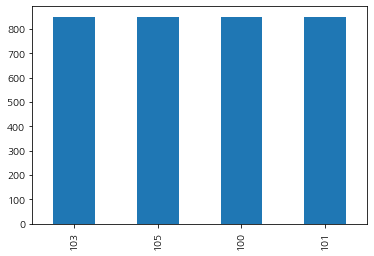

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "NanumGothic"

df['category'].value_counts().plot(kind = 'bar')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['news_text'], df['category'], test_size = 0.25)

In [ ]:
len(X_train)

2547

In [ ]:
len(y_test)

849

### 파라미터
- max_df 전체 문서에 너무 높은 빈도수를 갖는 단어 피처를 제외하기 위한 파라미터
- min_df 전체 문서에 너무 낮은 빈도수를 갖는 단어  피처를 제외하기 위한 파라미터
- max_features 추출하는 피처의 개수 제한
- stop_words stopwords로 지정된 단어는 추출에서 제외
- n_gram_range 단어 순서를 보완하는 n_gram 범위 설정
- tokenizer 토큰화를 별도의 커스텀 함수를 사용할 때 적용

In [ ]:
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

okt = Okt() # 객체 생성

def okt_tokenizer(text):
    tokens_ko = okt.morphs(text)
    return tokens_ko

tfidf_vect = TfidfVectorizer(tokenizer = okt_tokenizer, ngram_range = (1, 2), min_df = 3, max_df = 0.9)
tfidf_vect.fit(X_train)
tfidf_matrix_train = tfidf_vect.transform(X_train)
tfidf_matrix_test = tfidf_vect.transform(X_test)

C:\Users\HOME\anaconda3\envs\cakd5\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
lr = LogisticRegression(random_state=0)
lr.fit(tfidf_matrix_train , y_train)
pred = lr.predict(tfidf_matrix_test)
print('TF-IDF Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

In [ ]:
# RogisticRegression - GridSearchCV
from sklearn.linear_model import LogisticRegression
lg_clf = LogisticRegression(random_state = 0, n_jobs = -1)

params = {'C': [1, 3.5, 4.5, 5.5, 10]}

grid_cv = GridSearchCV(lg_clf, param_grid = params, cv = 3, scoring = 'accuracy', verbose = 1)
grid_cv.fit(tfidf_matrix_train, y_train)
print('최적 파라미터 :', grid_cv.best_params_, '/ 최적 파라미터의 정확도 :', round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
최적 파라미터 : {'C': 5.5} / 최적 파라미터의 정확도 : 0.9972
